In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

### Create matrix from data

#### 1. bag of words

In bag-of-words model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

#### 2. Tf-idf

TF-IDF is a way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how commmon/rare the term is.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors_tfidf.shape

(2034, 26576)

### Singular Value Decomposition (SVD)

The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

#### 1. bag of words

In [7]:
from scipy import linalg
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 56.6 s, sys: 1.67 s, total: 58.3 s
Wall time: 15.8 s


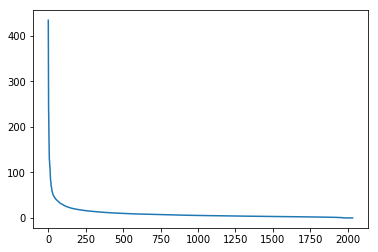

In [8]:
plt.plot(s)

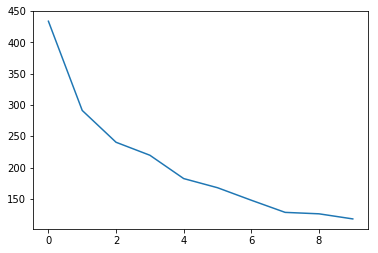

In [9]:
plt.plot(s[:10])

In [10]:
vocab = np.array(vectorizer.get_feature_names())

In [11]:
vocab[10000:10010]

array(['factors', 'factory', 'facts', 'factsnet', 'factual', 'factually',
       'faculty', 'fade', 'fades', 'fading'],
      dtype='<U80')

In [12]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [13]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

#### 2. tfidf

In [14]:
%time U, s, Vh = linalg.svd(vectors_tfidf, full_matrices=False)

CPU times: user 57 s, sys: 1.65 s, total: 58.6 s
Wall time: 16.4 s


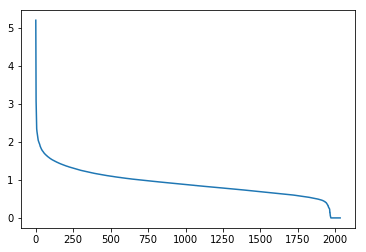

In [15]:
plt.plot(s)

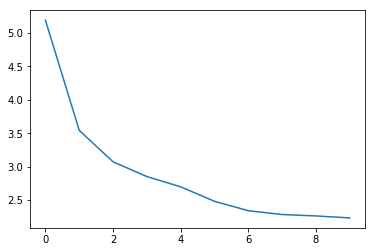

In [16]:
plt.plot(s[:10])

In [17]:
vocab = np.array(vectorizer_tfidf.get_feature_names())

In [18]:
vocab[10000:10010]

array(['factors', 'factory', 'facts', 'factsnet', 'factual', 'factually',
       'faculty', 'fade', 'fades', 'fading'],
      dtype='<U80')

In [19]:
show_topics(Vh[:10])

['ditto critus 141592654 n4 point_node asg collegue pnp',
 'space graphics thanks program files image nasa ftp',
 'space nasa launch shuttle moon orbit lunar station',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'objective think morality don just people moral values',
 'objective morality values moral god science space subjective',
 'graphics comp god software group objective aspects edu',
 'image file cview graphics data use just images',
 'jesus objective christ christian software christians bible did',
 'edu space jesus ftp file nasa files pub']

### Non-negative Matrix Factorization (NMF)

Nonnegative matrix factorization (NMF) is a non-exact factorization that factors into one skinny positive matrix and one short positive matrix. NMF is NP-hard and non-unique. 

#### 1.bag of words

In [20]:
from sklearn import decomposition
clf = decomposition.NMF(n_components=10, random_state=1)

In [21]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [22]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail ray 128 send 3d',
 'launch space satellite commercial market satellites year data',
 'jesus matthew prophecy people said messiah david isaiah',
 'image data processing software analysis images edu tools',
 'god atheists atheism religious believe religion people does',
 'space nasa shuttle center information available propulsion list',
 'probe lunar mars moon surface probes orbit earth',
 'argument fallacy conclusion example true ad argumentum premises',
 'data available ftp edu image graphics pub sgi']

#### 2. tfidf

In [23]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [24]:
show_topics(H1)

['don people think just like say know ve',
 'files file image format cview tiff gif use',
 'space nasa launch shuttle orbit lunar moon station',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god atheism believe belief exist does existence atheists',
 'objective morality values moral subjective science absolute claim',
 'graphics comp software group 3d aspects amiga hardware',
 'thanks know advance looking mail does help hi',
 'jesus bible christian christians christ law god jews',
 'card mode vesa windows vga video color driver']